In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data Preparation

In [2]:
df = pd.read_csv('Customer Preference Survey.csv')

df.head(10)

,Date,Time,Transaction,Mountain Bike,Collagen,Brownie,MaeKong,Botox,Weed,Hemp,...,Baby Mango,Automatic Cat Toilet,Chanel Bag,Rice with Pork Leg and Hoof Stewed,Cordyceps,Health Pillow for Insomnia,Clean Food for Cat,Dedoo Orange Juice,Authorized Software,Sunscreen
0,20/3/2021,11:53:45,1,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,20/3/2021,11:54:01,2,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,20/3/2021,11:54:05,3,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,20/3/2021,11:54:13,4,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,20/3/2021,11:54:18,5,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
5,20/3/2021,11:54:21,6,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,NaN,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
6,20/3/2021,11:54:34,7,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
7,20/3/2021,11:54:40,8,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
8,20/3/2021,11:54:46,9,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย
9,20/3/2021,11:54:47,10,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย


In [3]:
df = df.iloc[:, 3:]
df.drop('Food Waste Shredder.1', axis=1, inplace=True)
df.dropna(inplace=True)
df.replace({'เคย':1, 'ไม่เคย':0}, inplace=True)

df.head(10)

,Mountain Bike,Collagen,Brownie,MaeKong,Botox,Weed,Hemp,Blood Pressure Meter,RGB Lightblub,Bikini Wax Course,...,Baby Mango,Automatic Cat Toilet,Chanel Bag,Rice with Pork Leg and Hoof Stewed,Cordyceps,Health Pillow for Insomnia,Clean Food for Cat,Dedoo Orange Juice,Authorized Software,Sunscreen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,1
8,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
9,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
10,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
11,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
12,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,1,1


# Exploratory Data Analysis

In [4]:
df.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sunscreen,40.0,1.000,0.000000,1.0,1.0,1.0,1.00,1.0
Bag,40.0,1.000,0.000000,1.0,1.0,1.0,1.00,1.0
Shabu,40.0,1.000,0.000000,1.0,1.0,1.0,1.00,1.0
Roti,40.0,0.975,0.158114,0.0,1.0,1.0,1.00,1.0
Curry Puff,40.0,0.950,0.220721,0.0,1.0,1.0,1.00,1.0
Cashew Nuts,40.0,0.900,0.303822,0.0,1.0,1.0,1.00,1.0
Side Pillow,40.0,0.875,0.334932,0.0,1.0,1.0,1.00,1.0
Fan,40.0,0.825,0.384808,0.0,1.0,1.0,1.00,1.0
Authorized Software,40.0,0.800,0.405096,0.0,1.0,1.0,1.00,1.0
Sun Dried Pork,40.0,0.800,0.405096,0.0,1.0,1.0,1.00,1.0


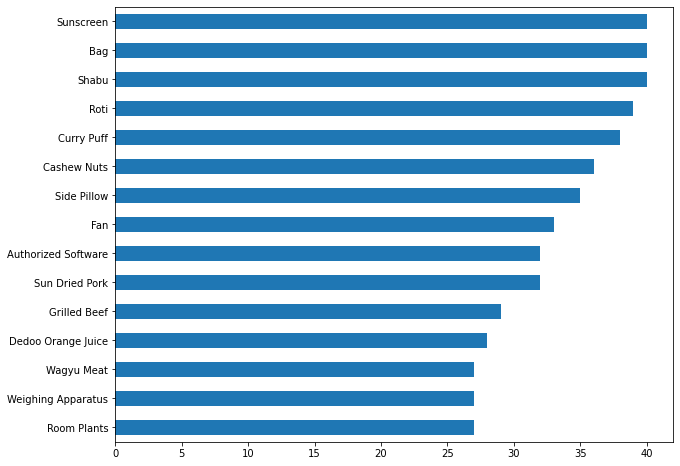

In [5]:
plt.figure(figsize=(10, 8))
df.sum(axis=0).sort_values(ascending=False).head(15).plot(kind='barh').invert_yaxis()

# Market Basket Analysis

In [6]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets.head(10)

,support,itemsets
0,0.525,(Collagen)
1,0.675,(Room Plants)
2,0.875,(Side Pillow)
3,0.675,(Weighing Apparatus)
4,0.950,(Curry Puff)
5,0.625,(Lego)
6,0.825,(Fan)
7,0.600,(Dumbell)
8,0.525,(Vaccum Robot)
9,0.675,(Wagyu Meat)


In [7]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
379811,"(Sunscreen, Cashew Nuts, Authorized Software, ...","(Fan, Bag, Wagyu Meat)",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
320707,"(Authorized Software, Curry Puff, Grilled Beef...","(Bag, Fan, Roti, Wagyu Meat)",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
378841,"(Roti, Bag, Wagyu Meat, Fan, Shabu)","(Authorized Software, Curry Puff, Grilled Beef...",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
378910,"(Roti, Authorized Software, Curry Puff, Grille...","(Fan, Bag, Wagyu Meat, Shabu)",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
378945,"(Shabu, Authorized Software, Curry Puff, Grill...","(Bag, Fan, Roti, Wagyu Meat)",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
378960,"(Bag, Authorized Software, Curry Puff, Grilled...","(Fan, Roti, Wagyu Meat, Shabu)",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
378973,"(Fan, Roti, Wagyu Meat, Shabu)","(Bag, Authorized Software, Curry Puff, Grilled...",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
378988,"(Bag, Fan, Roti, Wagyu Meat)","(Shabu, Authorized Software, Curry Puff, Grill...",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
379023,"(Fan, Bag, Wagyu Meat, Shabu)","(Roti, Authorized Software, Curry Puff, Grille...",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333
396475,"(Fan, Wagyu Meat, Shabu)","(Sunscreen, Roti, Bag, Authorized Software, Cu...",0.575,0.575,0.5,0.869565,1.512287,0.169375,3.258333


# Visualization

In [8]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] >= 1.05) & (rules['confidence'] >= 0.5)]
simple_rules.loc[:, 'antecedents'] = simple_rules.loc[:, 'antecedents'].apply(lambda x: list(x)[0]).astype('unicode')
simple_rules.loc[:, 'consequents'] = simple_rules.loc[:, 'consequents'].apply(lambda x: list(x)[0]).astype('unicode')
simple_rules.loc[:, 'lift'] = simple_rules.loc[:, 'lift'].round(3)
simple_rules.sort_values('lift', ascending=False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,Grilled Beef,Wagyu Meat,0.725,0.675,0.650,0.896552,1.328,0.160625,3.141667
157,Wagyu Meat,Grilled Beef,0.675,0.725,0.650,0.962963,1.328,0.160625,7.425000
17,Lego,Room Plants,0.625,0.675,0.525,0.840000,1.244,0.103125,2.031250
16,Room Plants,Lego,0.675,0.625,0.525,0.777778,1.244,0.103125,1.687500
70,Weighing Apparatus,Board Game,0.675,0.650,0.500,0.740741,1.140,0.061250,1.350000
71,Board Game,Weighing Apparatus,0.650,0.675,0.500,0.769231,1.140,0.061250,1.408333
25,Grilled Beef,Room Plants,0.725,0.675,0.550,0.758621,1.124,0.060625,1.346429
24,Room Plants,Grilled Beef,0.675,0.725,0.550,0.814815,1.124,0.060625,1.485000
155,Sun Dried Pork,Wagyu Meat,0.800,0.675,0.600,0.750000,1.111,0.060000,1.300000
154,Wagyu Meat,Sun Dried Pork,0.675,0.800,0.600,0.888889,1.111,0.060000,1.800000


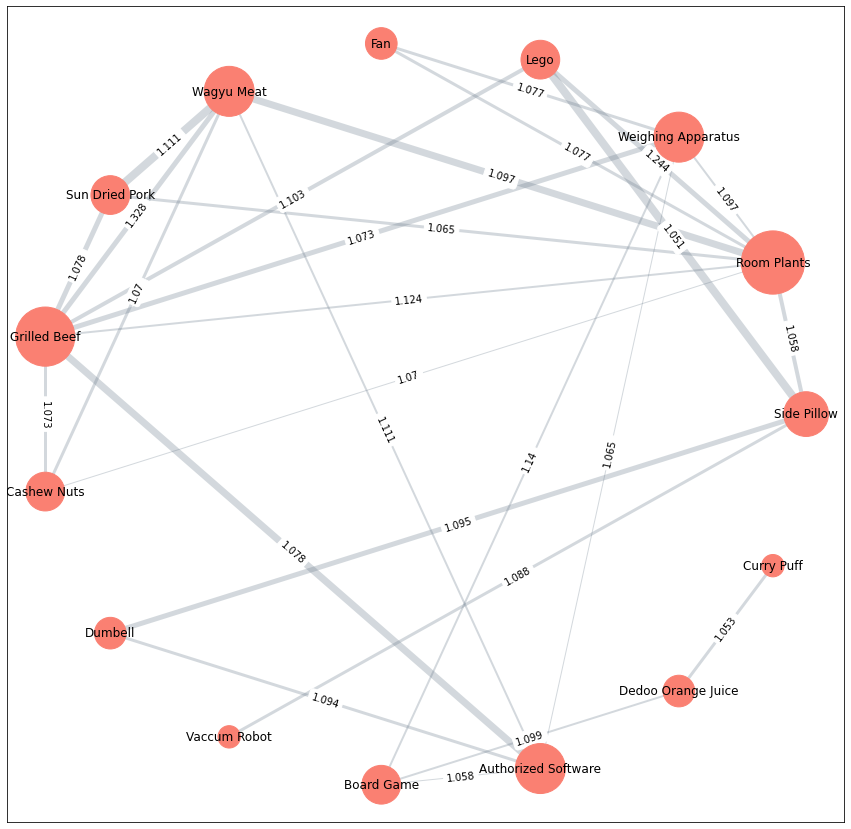

In [9]:
plt.figure(figsize=(15, 15))

G = nx.from_pandas_edgelist(simple_rules, source='antecedents', target='consequents', edge_attr='lift')
pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, nodelist=dict(G.degree).keys(), node_size=[s*500 for s in dict(G.degree).values()], node_color='salmon')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=[w for w in dict(G.degree).values()], edge_color='slategray')
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'lift'))

plt.show()